In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from numpy import arange
import math

import seaborn as sns
sns.set_style("white")

import scipy as sp
from scipy import linalg, optimize

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import collections
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.path as mpath
from matplotlib.dates import DateFormatter

import calendar
import datetime as dt
fromtimestamp = dt.datetime.fromtimestamp


In [3]:
# import ufo data, assign ufo_id and sort
ufo = pd.read_csv('../data/ufo_clean.csv', index_col = 0)
ufo = ufo.rename(columns={'index':'ufo_id','year_week':'week_id'})
ufo['ufo_id'] = 1
ufo = ufo.sort_values('week_id')
# confirm
ufo.head()

,ufo_id,week_id,date_of_sight,year,month,week_of_year,state,city,sight_summary,ufo_shape
2,1,2006-1,2006-01-02,2006,1,1,MI,Ann Arbor,"Probable HOAX: 5 ufos, silent black objects, m...",Changing
3,1,2006-1,2006-01-02,2006,1,1,VA,Fredericksburg,clear sky looked like a star 10:00 am in the m...,Light
4,1,2006-1,2006-01-04,2006,1,1,PA,Scotland,"Small, white, light in the northeast sky...dis...",Light
53,1,2006-10,2006-03-06,2006,3,10,CA,North Hills,"((HOAX)) As I sat in my car taking my break, I...",Egg
54,1,2006-10,2006-03-07,2006,3,10,CA,Desert Hot Springs,Twin OrangeTriangles flying at extrememly high...,Chevron


In [4]:
# get ufo counts per year and save to "ufosperyear" df
ufosperyear = pd.DataFrame(ufo['year'].value_counts()).reset_index().rename(columns={'index':'year_id','year':'yearly_ufocount'})
# review
ufosperyear.head()

,year_id,yearly_ufocount
0,2014,7431
1,2012,6867
2,2013,6602
3,2015,5880
4,2016,4848


In [37]:
# get max ufo per week count and save it to ufomax
ufoyearmax = ufosperyear.yearly_ufocount.max()

# define 1 percent value: (ufoyearmax = 100 pct)
onepc_ufoyear = ufoyearmax/100

# assign col with percentage vals
ufosperyear['yearly_pct_entrtm'] = ufosperyear['yearly_ufocount']/onepc_ufoyear

# review
ufosperyear.columns


Index(['year_id', 'yearly_ufocount', 'yearly_pct_entrtm'], dtype='object')

In [38]:
    # export and set to comment after
#ufosperyear.to_csv('../Data/Datasets/yearly_ufopct_entrtm.csv')

array([[<AxesSubplot:title={'center':'yearly_ufocount'}>]], dtype=object)

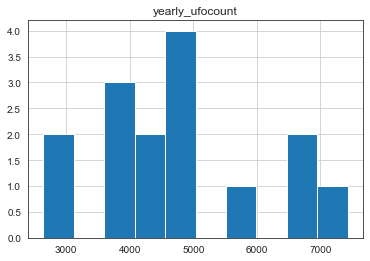

In [44]:
# plot yearly number of ufosights
cols = ['Year','Count of UFOs']
df = ufosperyear.copy()
df = df.sort_values('year_id')
df = df.set_index('year_id').drop(columns='yearly_pct_entrtm')
df.hist()